In [1]:
import umap.umap_ as umap
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import  GaussianMixture

/scratch/.amisery/penv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.append("/home/amisery/SemesterProject")
from models.engine_nodecl import NodeClassificationEngine
from data.sfgd_datamodules import NodeCL_h5dataset
from data.plotting_utils import *
from models.model_utils import *

In [3]:
%load_ext autoreload
%autoreload 2

## Loading Dataset and model

In [4]:
ckpt_path_deep = "/home/amisery/SemesterProject/saved_logs/version_56/checkpoints/epoch=63-step=13120.ckpt"
ckpt_path_deep = "/home/amisery/SemesterProject/tb_logs/my_model/version_50/checkpoints/epoch=49-step=10250.ckpt"
ckpt_path_fweight = "/home/amisery/SemesterProject/tb_logs/my_model/version_2/checkpoints/epoch=47-step=9840.ckpt"
model = NodeClassificationEngine.load_from_checkpoint(ckpt_path_deep, map_location="cpu", strict=False)

In [5]:
dataset_h5 = NodeCL_h5dataset("/scratch/.amisery/out_cap_1000.h5")

In [6]:
batch = get_batch_from_data(dataset_h5,0)

In [7]:
batch[1].shape

torch.Size([1, 238, 3])

In [8]:
# l = 0
# max_l = 10000
# out_emb = torch.empty(0)
# out_lab = torch.empty(0)
# mis_cl = torch.empty(0)
# while l < max_l :
#     i = np.random.randint(len(dataset_h5))
#     batch = get_batch_from_data(dataset_h5,i)
#     model_pred = torch.argmax(model(batch[0],batch[2]), dim=2)+1
#     out_emb = torch.cat((out_emb,model.model.encoder(model.model.lin_emb(batch[0]), batch[2]).squeeze(0)))
#     g_truth = torch.argmax(batch[1], dim=2).squeeze(0) +1
#     out_lab = torch.cat((out_lab, g_truth))
#     mis_cl = torch.cat((mis_cl,(g_truth==model_pred).int().squeeze(0)))
#     l += batch[0].shape[1]


In [9]:
# umapT = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='euclidean')
# u_fit = umapT.fit_transform(out_emb.detach().numpy())
# u_fit_x = u_fit[:,0]
# u_fit_y = u_fit[:,1]

In [10]:
plt.rcParams.update({'font.size': 12})

In [11]:
# label_map = np.array(["Multi Particle", "Single Particle", "Ghost/Crosstalk"])
# mis_cl_map = np.array(["Misclassified", "Correctly Predicted"])
# fig = plt.figure(figsize=(12,6))
# ax = plt.subplot(1,2,1)
# sns.scatterplot(x = u_fit_x, y = u_fit_y, hue = label_map[out_lab.int()-1], palette = "tab10",ax=ax)
# ax.legend()
# ax.set_xlabel("Proj-1")
# ax.set_ylabel("Proj-2")
# ax = plt.subplot(1,2,2)
# sns.scatterplot(x = u_fit_x, y = u_fit_y, hue = mis_cl_map[mis_cl.int()], palette = "magma", ax=ax)
# ax.legend()
# fig.suptitle("UMAP projection of the vector embedding for each vertex, computed on %d hits"%(max_l))
# ax.set_xlabel("Proj-1")
# ax.set_ylabel("Proj-2")


Let's now do the same but for a single event :

In [12]:
out_emb_s = torch.empty(0)
out_lab_s = torch.empty(0)
mis_cl_s = torch.empty(0)

i = np.random.randint(len(dataset_h5))
batch = get_batch_from_data(dataset_h5,i)
model_pred = torch.argmax(model(batch[0],batch[2]), dim=2)+1
out_emb_s = torch.cat((out_emb_s,model.model.encoder(model.model.lin_emb(batch[0]), batch[2]).squeeze(0)))
g_truth = torch.argmax(batch[1], dim=2).squeeze(0) +1
out_lab_s = torch.cat((out_lab_s, g_truth))
mis_cl_s = torch.cat((mis_cl_s,(g_truth==model_pred).int().squeeze(0)))

NameError: name 'l' is not defined

In [ ]:
c_num=8

In [24]:
def umap_indiv(idx):
    out_emb_s = torch.empty(0)
    out_lab_s = torch.empty(0)
    mis_cl_s = torch.empty(0)

    # i = np.random.randint(len(dataset_h5))
    batch = get_batch_from_data(dataset_h5,idx)
    model_pred = torch.argmax(model(batch[0],batch[2]), dim=2)+1
    out_emb_s = torch.cat((out_emb_s,model.model.encoder(model.model.lin_emb(batch[0]), batch[2]).squeeze(0)))
    g_truth = torch.argmax(batch[1], dim=2).squeeze(0) +1

    out_lab_s = torch.cat((out_lab_s, g_truth))
    mis_cl_s = torch.cat((mis_cl_s,(g_truth==model_pred).int().squeeze(0)))
    
    umapT = umap.UMAP(n_neighbors=7, min_dist=0.1, metric='euclidean')
    u_fit_s = umapT.fit_transform(out_emb_s.detach().numpy())
    u_fit_x_s = u_fit_s[:,0]
    u_fit_y_s = u_fit_s[:,1]
    gm = GaussianMixture(n_components=c_num)
    out_cluster = gm.fit_predict(u_fit_s)
   

    label_map = np.array(["Multi Particle", "Single Particle", "Ghost/Crosstalk"])
    mis_cl_map = np.array(["Misclassified", "Correctly Predicted"])
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    sns.scatterplot(ax = ax,x = u_fit_x_s, y = u_fit_y_s, hue = label_map[out_lab_s.int()-1], palette = "tab10")
    ax.legend()

    fig.suptitle("UMAP projection of the vector embedding for each vertex, computed on %d hits"%(len(out_emb_s)))
    ax.set_xlabel("Proj-1")
    ax.set_ylabel("Proj-2")
    ax = plt.subplot(1,2,2)
    sns.scatterplot(ax = ax, x = u_fit_x_s, y = u_fit_y_s, hue = out_cluster, palette = "tab10")

    return batch[0] , u_fit_s , out_cluster



In [20]:
def plot3d(coords,u_fit_s, out_cluster):
    t = coords.squeeze(0)
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(1,1,1,projection='3d')
    for c in range(c_num):
        sel = out_cluster==c
        ax.scatter(t[sel,0],t[sel,1],t[sel,2], color=plt.cm.tab10.colors[c] , edgecolor = "black", alpha = 1, label = "cluster %d"%(c))

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Event display")
    plt.show()
    plt.clf()
    ax = fig.add_subplot(1,1,1)
    sns.scatterplot(ax = ax,x = u_fit_s[:,0], y = u_fit_s[:,1], hue = out_cluster, palette = "tab10")
    ax.set_title("Gaussian Mixtures clustering on UMAP embedding of a single hit with %d clusters"%(c_num))
    plt.show()

In [ ]:
len(dataset_h5)

307435

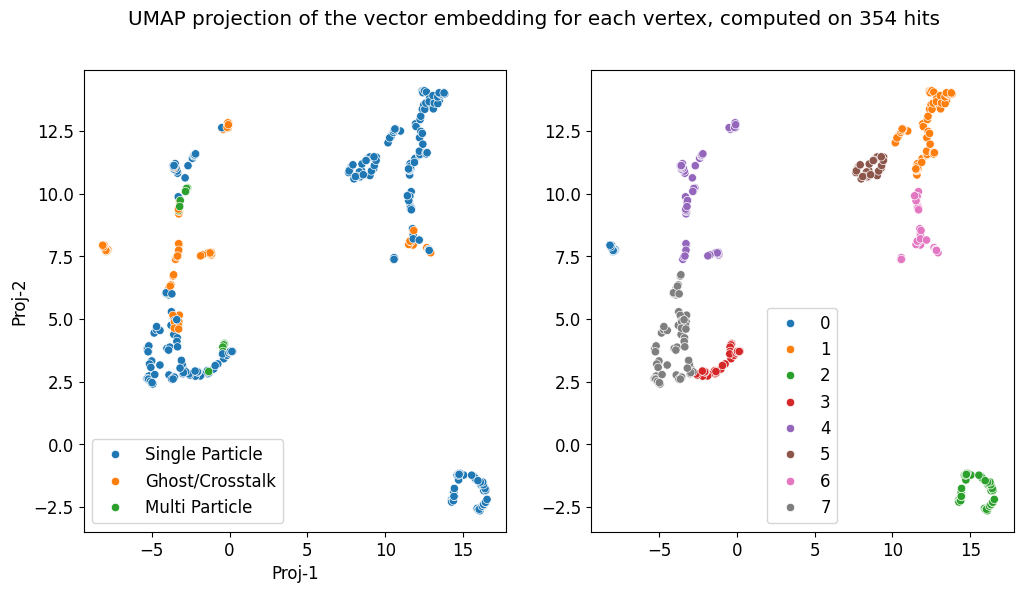

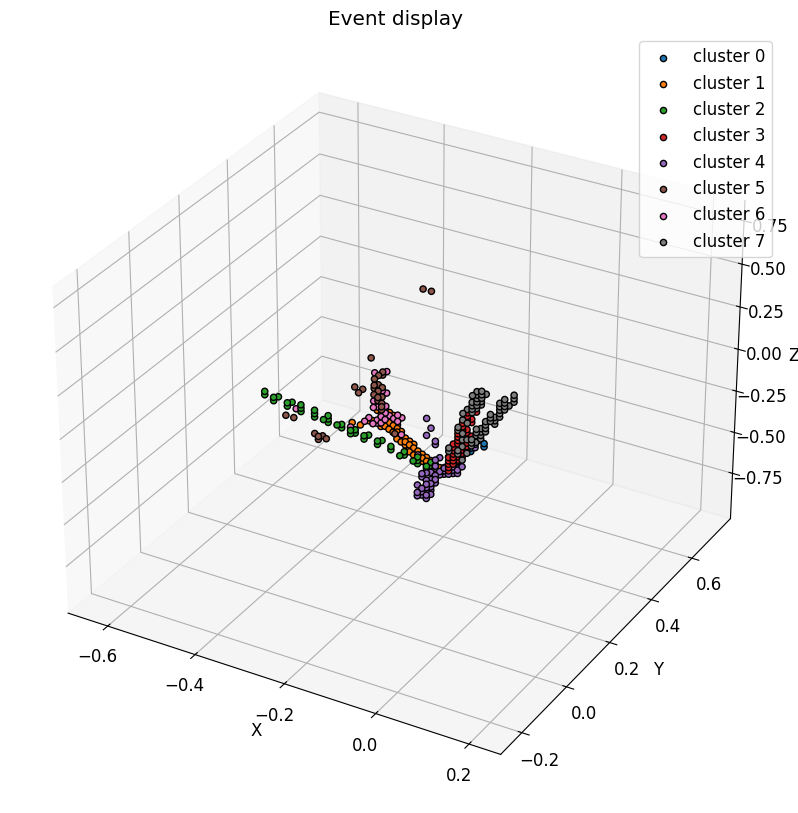

<Figure size 640x480 with 0 Axes>

In [40]:
idx = np.random.randint(len(dataset_h5))
plot3d(*umap_indiv(idx))

In [15]:
umapT = umap.UMAP(n_neighbors=7, min_dist=0.1, metric='euclidean')
u_fit_s = umapT.fit_transform(out_emb_s.detach().numpy())
u_fit_x_s = u_fit_s[:,0]
u_fit_y_s = u_fit_s[:,1]

/scratch/.amisery/penv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0, 0.5, 'Proj-2')

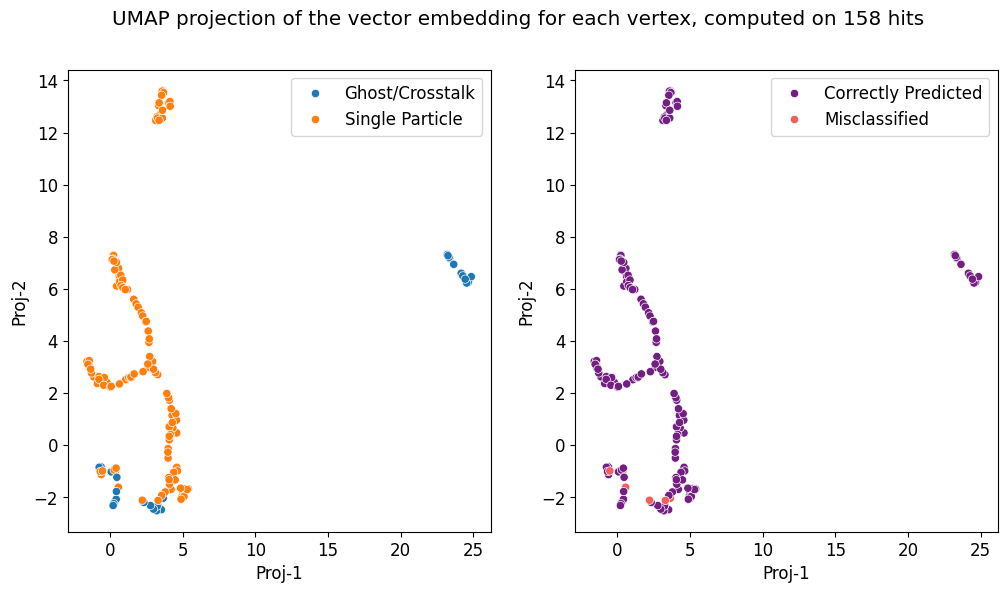

In [16]:
label_map = np.array(["Multi Particle", "Single Particle", "Ghost/Crosstalk"])
mis_cl_map = np.array(["Misclassified", "Correctly Predicted"])
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
sns.scatterplot(ax = ax,x = u_fit_x_s, y = u_fit_y_s, hue = label_map[out_lab_s.int()-1], palette = "tab10")
ax.legend()

fig.suptitle("UMAP projection of the vector embedding for each vertex, computed on %d hits"%(len(out_emb_s)))
ax.set_xlabel("Proj-1")
ax.set_ylabel("Proj-2")
ax = plt.subplot(1,2,2)
sns.scatterplot(ax = ax,x = u_fit_x_s, y = u_fit_y_s, hue = mis_cl_map[mis_cl_s.int()], palette = "magma")
ax.legend()
ax.set_xlabel("Proj-1")
ax.set_ylabel("Proj-2")

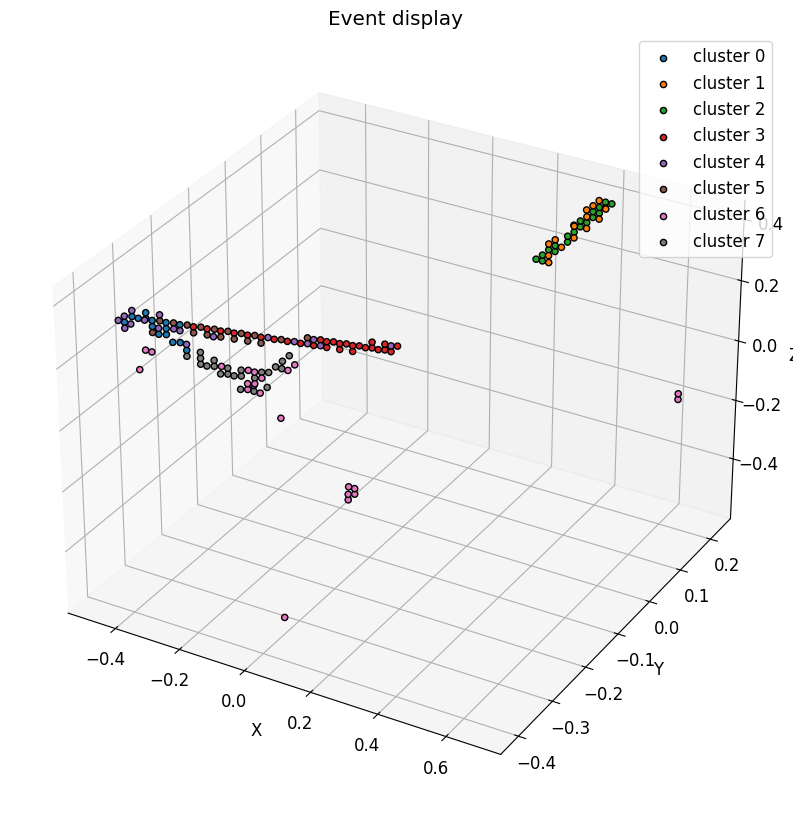

<Figure size 640x480 with 0 Axes>

In [21]:
plot3d(batch[0], u_fit_s,out_cluster)

<Axes: >

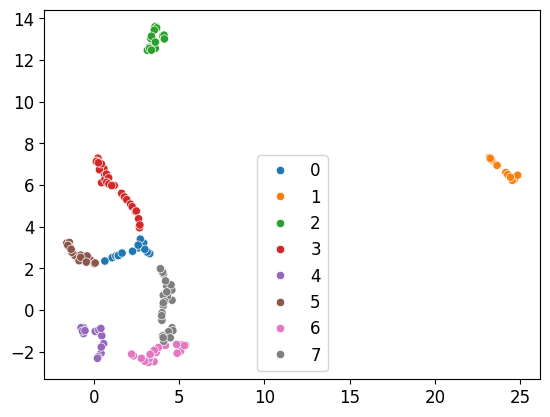

In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import  GaussianMixture
km = KMeans(n_clusters=5, algorithm="elkan")
c_num = 8
gm = GaussianMixture(n_components=c_num)
out_cluster = gm.fit_predict(u_fit_s)
sns.scatterplot(x = u_fit_x_s, y = u_fit_y_s, hue = out_cluster, palette = "tab10")

<Axes: title={'center': 'Gaussian Mixtures clustering of a single event with 8 clusters'}>

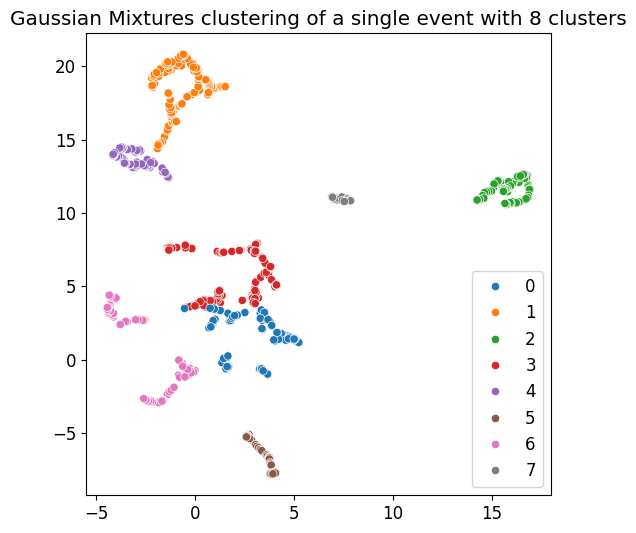

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Gaussian Mixtures clustering of a single event with %d clusters"%(c_num))
sns.scatterplot(x = u_fit_x_s, y = u_fit_y_s, hue = out_cluster, palette = "tab10")

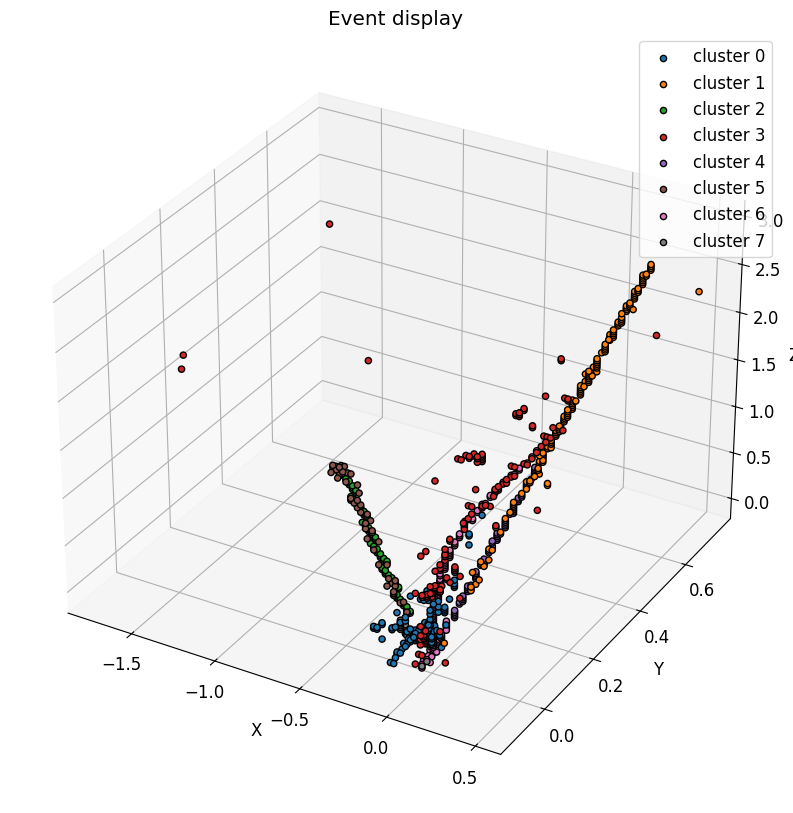

<Figure size 640x480 with 0 Axes>

In [ ]:
bat

torch.Size([1, 703, 4])

In [ ]:
np.logical_and(u_fit_x_s < 5 ,u_fit_y_s > 10)

array([ True, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,